# ENPH 213 - Week 9 Lab

In this lab, we will be working on numerically solving ordinary differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab9, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 (if delivered) will be marked out of 5.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Part 1

Consider the ordinary differential equation:

$\large \frac{dy}{dx} = -\frac{xy}{4}$

Solve numerically for y(x) for $-8 \leq x \leq 8$ with an intial condition that $y(0) = 1$.  

In solving this problem, develop code using Euler's method for positive $x$ (Forward) and negative $x$ (Backward).  Using 101 points in each region (positive $x$ and negative $x$), plot the curves on a single graph.

Then starting wit 101 points, use your code for the Backward Euler's method to test covergence.  Determine the number of points needed to satisfy this convergence condition:

$\Large \frac{\sum_i^{N+1} y(x_i)}{N+1} - \frac{\sum_i^N y(x_i)}{N} < 1 \times10^{-6}$


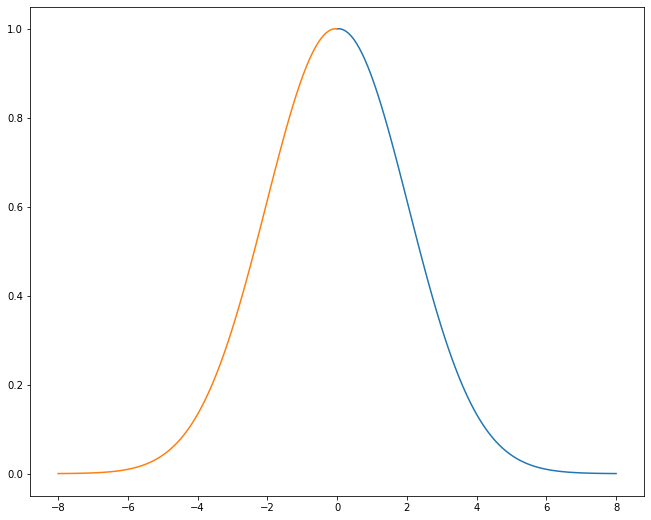

In [150]:
def f(x,y):
    return -x*y/4 #defining the equation

def Eulers(N, f, R):
    y = np.zeros(N)
    
    if(R < 0): #for the backwards function
        x = np.linspace(R,0,N) #everything similar to forward part except small changes to get the array reversed
        h = ((x[0]-x[-1]))/(N-1)
        y[N-1] = 1 #initial condition for backwards
        for i in range(N-2,-1,-1):
            y[i] = y[i+1]+h*f(x[i+1],y[i+1])
    
    else: #for the forwards function
        x = np.linspace(0,R,N) 
        h = ((x[-1]-x[0])/(N-1)) 
        y[0] = 1 #initial condition
        for i in range(1,N):
            y[i] = y[i-1]+h*f(x[i-1],y[i-1]) #equation from class
    
    return x,y

xfor,yfor = Eulers(101,f,8)
xback,yback = Eulers(101,f,-8) #call it twice to get the backwards and forwards  arrays
      
plt.plot(xfor,yfor)
plt.plot(xback,yback)

plt.rcParams['figure.figsize']= [11,9] #making all the plots more legible
plt.show()


In [140]:
N = 101 #starting number
while 1: #this starts an infinite loop
    x1, y1 = Eulers(N,f,-8)
    x2, y2 = Eulers(N+1,f,-8) #making the two arrays for N and N+1 points
    con1 = np.sum(y1)/(N)
    con2 = np.sum(y2)/(N+1)  #the two values needed for convergence
    if(abs(con2-con1) < 0.000001): #checks convergence condition
        break #breaks the loop when condition is met
    N += 1 #adds point each runthrough

print(N) #prints number of points required for convergence

596


# Part 2

Consider the ordinary differential equation:

$\large \frac{dy}{dx} = 100(\sin x - y)$

Solve numerically for y(x) for $0 \leq x \leq 8$ using 501 points and an intial condition that $y(0) = 0$.  

In solving this problem, develop code using the second order Runge-Katta Method with coefficients for mid-point form. Plot the curve on a graph.

Run your code two more times using 395 points and 400 points.  Plot the curves and comment on any discrepancies between the curves.

For comparison, solve the ODE re-using code from your Euler's Method above.  Run the code for the same three number of points (501, 395, and 400), plot the curves, and comment on the results.



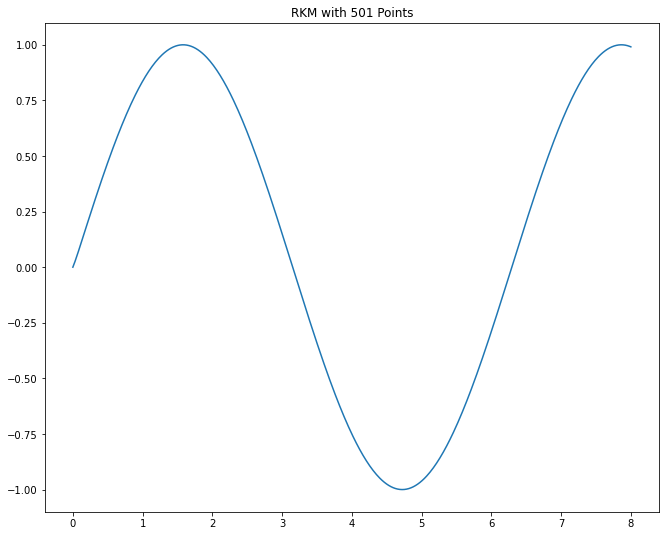

In [141]:
def f2(x,y):
    return 100*(np.sin(x)-y)

def RKM(N,f,R):
    x = np.linspace(0,R,N)
    y = np.zeros(N)
    h = (x[-1]-x[0])/(N-1)
    y[0] = 0
    
    for i in range(1,N):
        k = h*f(x[i-1],y[i-1])
        y[i] = y[i-1]+h*f(x[i-1]+h/2,y[i-1]+k/2)
    
    return x,y

x1,y1 = RKM(501,f2,8)
x2,y2 = RKM(395,f2,8)
x3,y3 = RKM(400,f2,8)
plt.title("RKM with 501 Points")
plt.plot(x1,y1)

Text(0.5, 1.0, 'RKM with 395 Points')

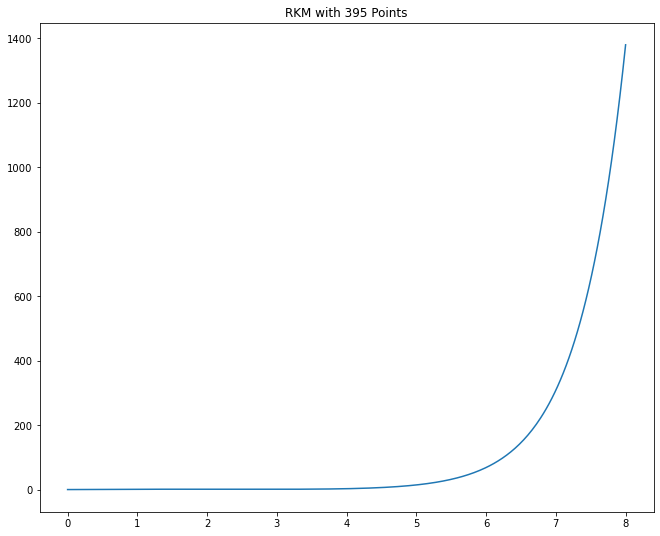

In [142]:
plt.plot(x2,y2)
plt.title("RKM with 395 Points")

Text(0.5, 1.0, 'RKM using 400 Points')

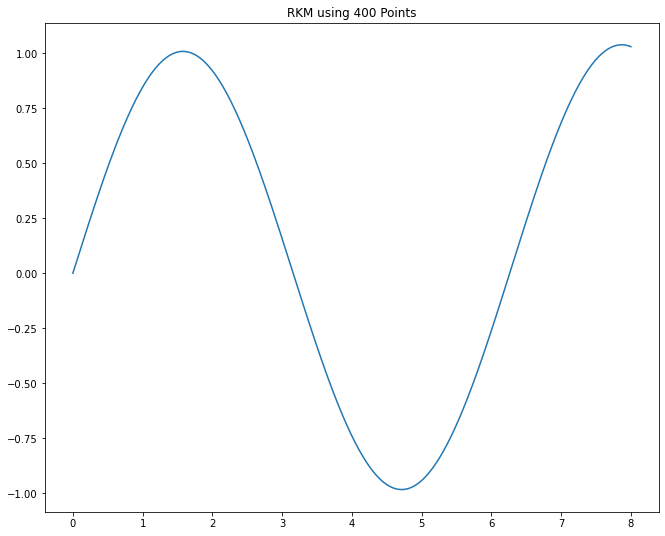

In [143]:
plt.plot(x3,y3)
plt.title("RKM using 400 Points")

Text(0.5, 1.0, 'Euler Method using 501 Points')

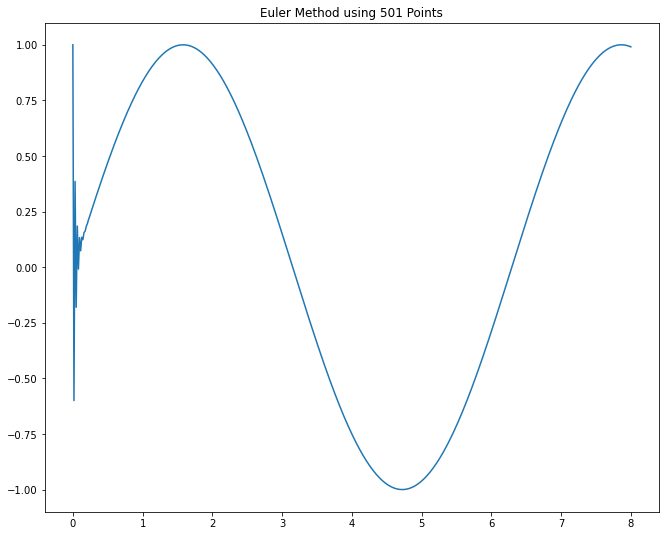

In [144]:
x11, y11 = Eulers(501,f2,8)
x22, y22 = Eulers(395,f2,8)
x33, y33 = Eulers(400,f2,8)
plt.plot(x11,y11)
plt.title("Euler Method using 501 Points")

Text(0.5, 1.0, 'Euler Method using 395 Points')

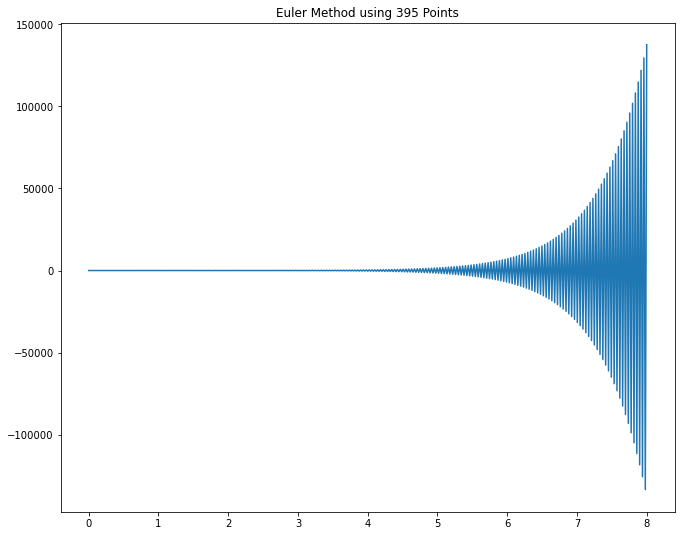

In [145]:
plt.plot(x22,y22)
plt.title("Euler Method using 395 Points")

Text(0.5, 1.0, 'Euler Method using 400 Points')

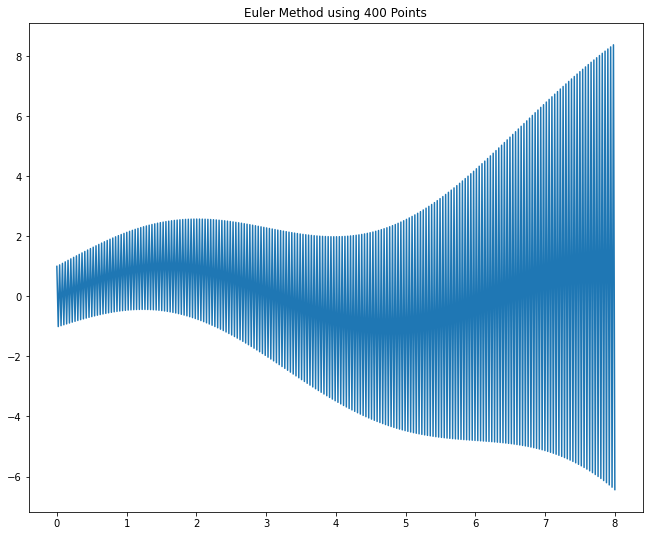

In [243]:
plt.plot(x33,y33)
plt.title("Euler Method using 400 Points")

The curves are very different when using the two different methods

# Part 3

The following ODEs are a simple model of a viral endemic:

The change in the number of Susceptible individuals (S) depends on their number, the number of Infected individuals (I), and the rate of infection (a)

$\large \frac{dS}{dt} = -aSI$

Similarly, the change in the number of Infected individuals mirrors the S-relation, but also includes a rate of recovery (r) of the Infected individuals (I)

$\large \frac{dI}{dt} = +aSI - rI$

Finally, the number of Recovered individuals (R) who are immune to re-infection changes as a function of the recovery rate and infected individuals

$\large \frac{dR}{dt} = rI$

Consider a city of 100,001 people (such as Kingston), all of whom are susceptible.  

a) If a single infectious individual enters the city at t = 0, use Euler's Method to compute the progression of the epidemic by looking at a period of 90 days. Plot the time-dependent populations on a single graph, and output the final numbers of each population. (Using Floats instead of integers is acceptable)

In the simulation, use the following parameters: 

Without intervention, it has been estimated that an infected Covid 19 individual will infect an average of 2.5 people over a period one week of being contagious (before symptoms).  So, let a = 2.5 / 7 / 100,001 = $3.571 \times 10^{-6}$ /person /day -- the proportion of people in the city an individual infects per day.

The typical recovery time is 14 days, so the rate is r = 1/14 = 0.0714/day.

b) The new Covid 19 variants can be 50% more infectious.  Run the simulation again, but with an infection rate that is 50% larger. (Output final values + graph)

c) Consider the effect of recovered individuals losing their immunity to the virus after a period of 60 days or at a rate of 1/(60 days).  Adjust you differential equations to account for this occurence and run the simulation again using the variant infection rate.  (Output final values + graph)

**QUESTION:  What seems to happen to the populations if immunity is lost?**

In [147]:
P = 100001 # Population
a1 = 3.571*10**-6 #Infection rate
r = 0.0714 #recovery rate
Days = 90 #number of days for simulation

def Sfunc(S,I,a):
    return -a*S*I

def Ifunc(S,I,a):
    return a*S*I-r*I

def Rfunc(I): #define all the rates
    return r*I

In [148]:
S = np.zeros(Days)
I = np.zeros(Days)
R = np.zeros(Days) #creating the base arrays for all the paramaters over the timespan
t = np.linspace(0,Days-1,Days) #time array to plot against each day

S[0] = 100000 # initial population so the entire population except for the one infected
I[0] = 1 #initial condition of one infected person
R[0] = 0 # 0 recovered to start
h = 1 #steps are always 1 day

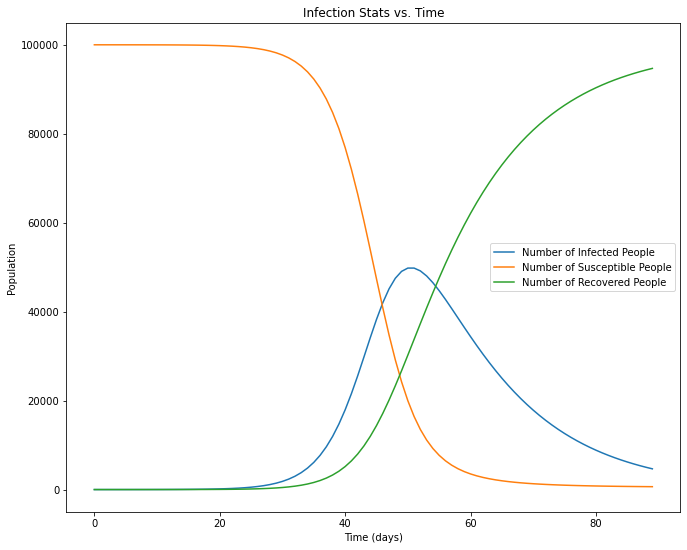

Number of Infected on Day 90:
 4661 
Number of Susceptible People on Day 90:
 645 
Number of Recovered People on Day 90:
 94693


In [166]:
for i in range(1,Days):
    I[i] = I[i-1] + h * Ifunc(S[i-1],I[i-1],a1)
    S[i] = S[i-1] + h * Sfunc(S[i-1],I[i-1],a1) 
    R[i] = R[i-1] + h * Rfunc(I[i-1]) #these run through the points using eulers method for each day

plt.plot(t,I)  
plt.plot(t,S)
plt.plot(t,R)
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend(['Number of Infected People', 'Number of Susceptible People', 'Number of Recovered People'])
plt.title("Infection Stats vs. Time")
plt.show()
print("Number of Infected on Day 90:\n", int(I[-1]),"\nNumber of Susceptible People on Day 90:\n",int(S[-1]),"\nNumber of Recovered People on Day 90:\n",int(R[-1]))

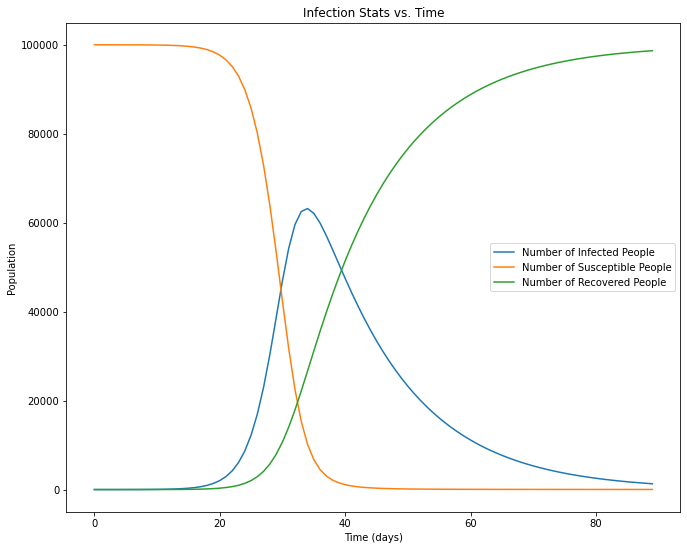

Number of Infected on Day 90:
 1306 
Number of Susceptible People on Day 90:
 24 
Number of Recovered People on Day 90:
 98670


In [167]:
a2 = a1*1.5
for i in range(1,Days):
    I[i] = I[i-1] + h * Ifunc(S[i-1],I[i-1],a2) #same code just changed the a value
    S[i] = S[i-1] + h * Sfunc(S[i-1],I[i-1],a2)
    R[i] = R[i-1] + h * Rfunc(I[i-1])

plt.plot(t,I)  
plt.plot(t,S)
plt.plot(t,R)
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend(['Number of Infected People', 'Number of Susceptible People', 'Number of Recovered People'])
plt.title("Infection Stats vs. Time")
plt.show()
print("Number of Infected on Day 90:\n", int(I[-1]),"\nNumber of Susceptible People on Day 90:\n",int(S[-1]),"\nNumber of Recovered People on Day 90:\n",int(R[-1]))

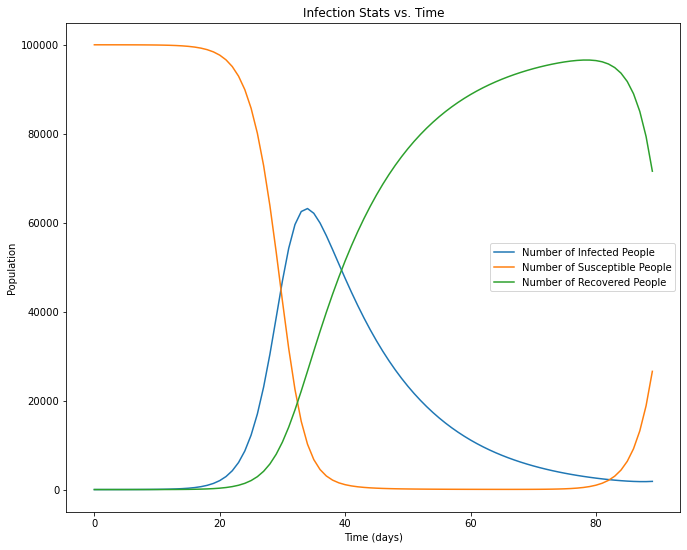

Number of Infected on Day 90:
 1839 
Number of Susceptible People on Day 90:
 26581 
Number of Recovered People on Day 90:
 71579


In [225]:
for i in range(1,Days):
    I[i] = I[i-1] + h * Ifunc(S[i-1],I[i-1],a2)
    S[i] = S[i-1] + h * Sfunc(S[i-1],I[i-1],a2)
    R[i] = R[i-1] + h * Rfunc(I[i-1])
    
    if(i > 60): #once this point is reached the recovered people begin to become susceptible again
        S[i] += R[i-60]
        R[i] -= R[i-60]
plt.plot(t,I)  
plt.plot(t,S)
plt.plot(t,R)
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend(['Number of Infected People', 'Number of Susceptible People', 'Number of Recovered People'])
plt.title("Infection Stats vs. Time")
plt.show()
print("Number of Infected on Day 90:\n", int(I[-1]),"\nNumber of Susceptible People on Day 90:\n",int(S[-1]),"\nNumber of Recovered People on Day 90:\n",int(R[-1]))

The number of susceptible people goes back up and the number of infected is higher on day 90 

# Part 4

Consider a mass on a spring sliding horizontally of a frictionless table.  The differential equation that describes this motion is

$m \frac{d^2x}{dt^2} = -kx$

Consider a block of mass 2~kg and a spring constant of 225 N/m.  If at time t=0, the block is at rest and displaced by a distance of 10cm, code a solution for the time dependence of the block using the algorithm discussed in class.  Plot the curve for time $0 \leq t \leq 5s$, and use np.fft.fft() to verify the frequency $\omega = \sqrt{\frac{k}{m}}$. Use 501 points for the solution.

To the right hand side of the differential equation, add an external force of the form:

$F_{ext} = 5 \cos(\omega t)$

Then solve the ODE with this external force for $5 \leq \omega \leq 15$ in steps of 0.1.  For each $\omega$, extract the maximum displacement using np.amax().  Plot the max displacement vs. $\omega$ to observe the resonant excitation that corresponds with the frequency from your FFT.

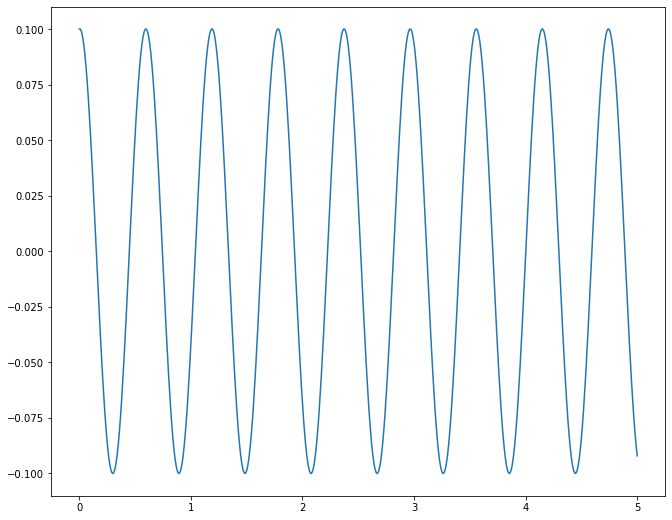

In [239]:
m = 2 #mass
k = 225 #spring constant
N = 501 #number of points
w = np.linspace(5,15,100)

def F(w,t):
    return 5*np.cos(w*t)/m

def f(x):
    return -k*x/m
    
def SODESolve(t,f,N):
    time = np.linspace(0,t,N) #array for all times
    x = np.zeros(N)
    dx = np.zeros(N) #x and x derivative arrays
    h = t/(N-1) #defining h as a constant 
    
    x[0] = 0.1
    dx[0] = 0 #initial conditions
    
    x[1] = x[0] + h*dx[0]
    
    for i in range(1,N-1):
        x[i+1] = h**2*f(x[i]) + 2*x[i]-x[i-1]
        dx[i] = (x[i] - x[i-1])/h
        
    return time, x

t1, x1 = SODESolve(5,f,N)
plt.plot(t1,x1)

16.749453597921782


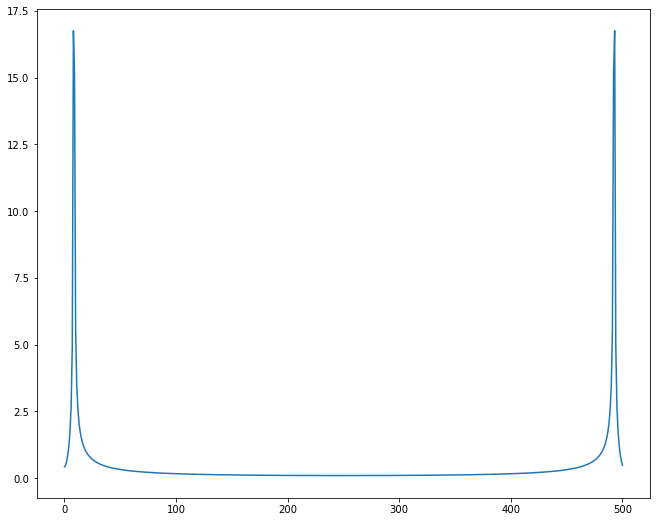

In [240]:
freq = np.fft.fft(x1)
plt.plot(abs(freq))
print(abs(freq[np.argmax(freq,axis=0)]))

plt.show()

5.303030303030303


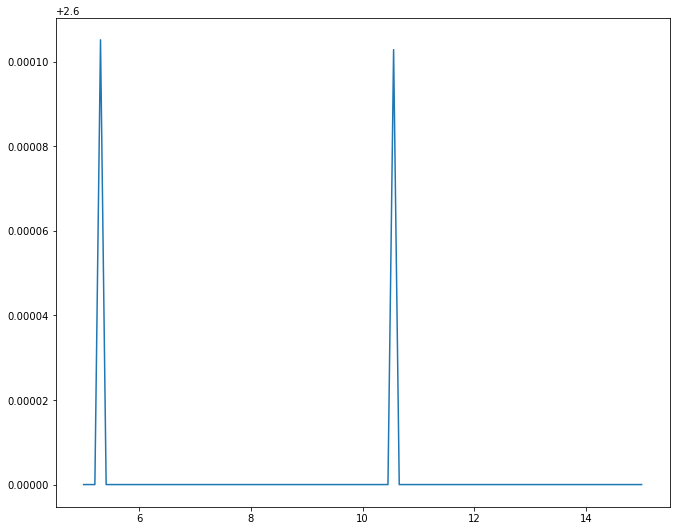

In [241]:
xmax = np.zeros(len(w))
for i in range(len(w)):
    
    Fext = (F(w[i],t1))
    xmax[i] = np.max(Fext+x1)

print(w[np.argmax(xmax,axis=0)])

plt.plot(w,xmax)

# Part 5

Part 5 tbd.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.